In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [ ]:
outbreaks = pd.read_csv("final_clean_idsfp.csv")

Text(0, 0.5, 'Illnesses')

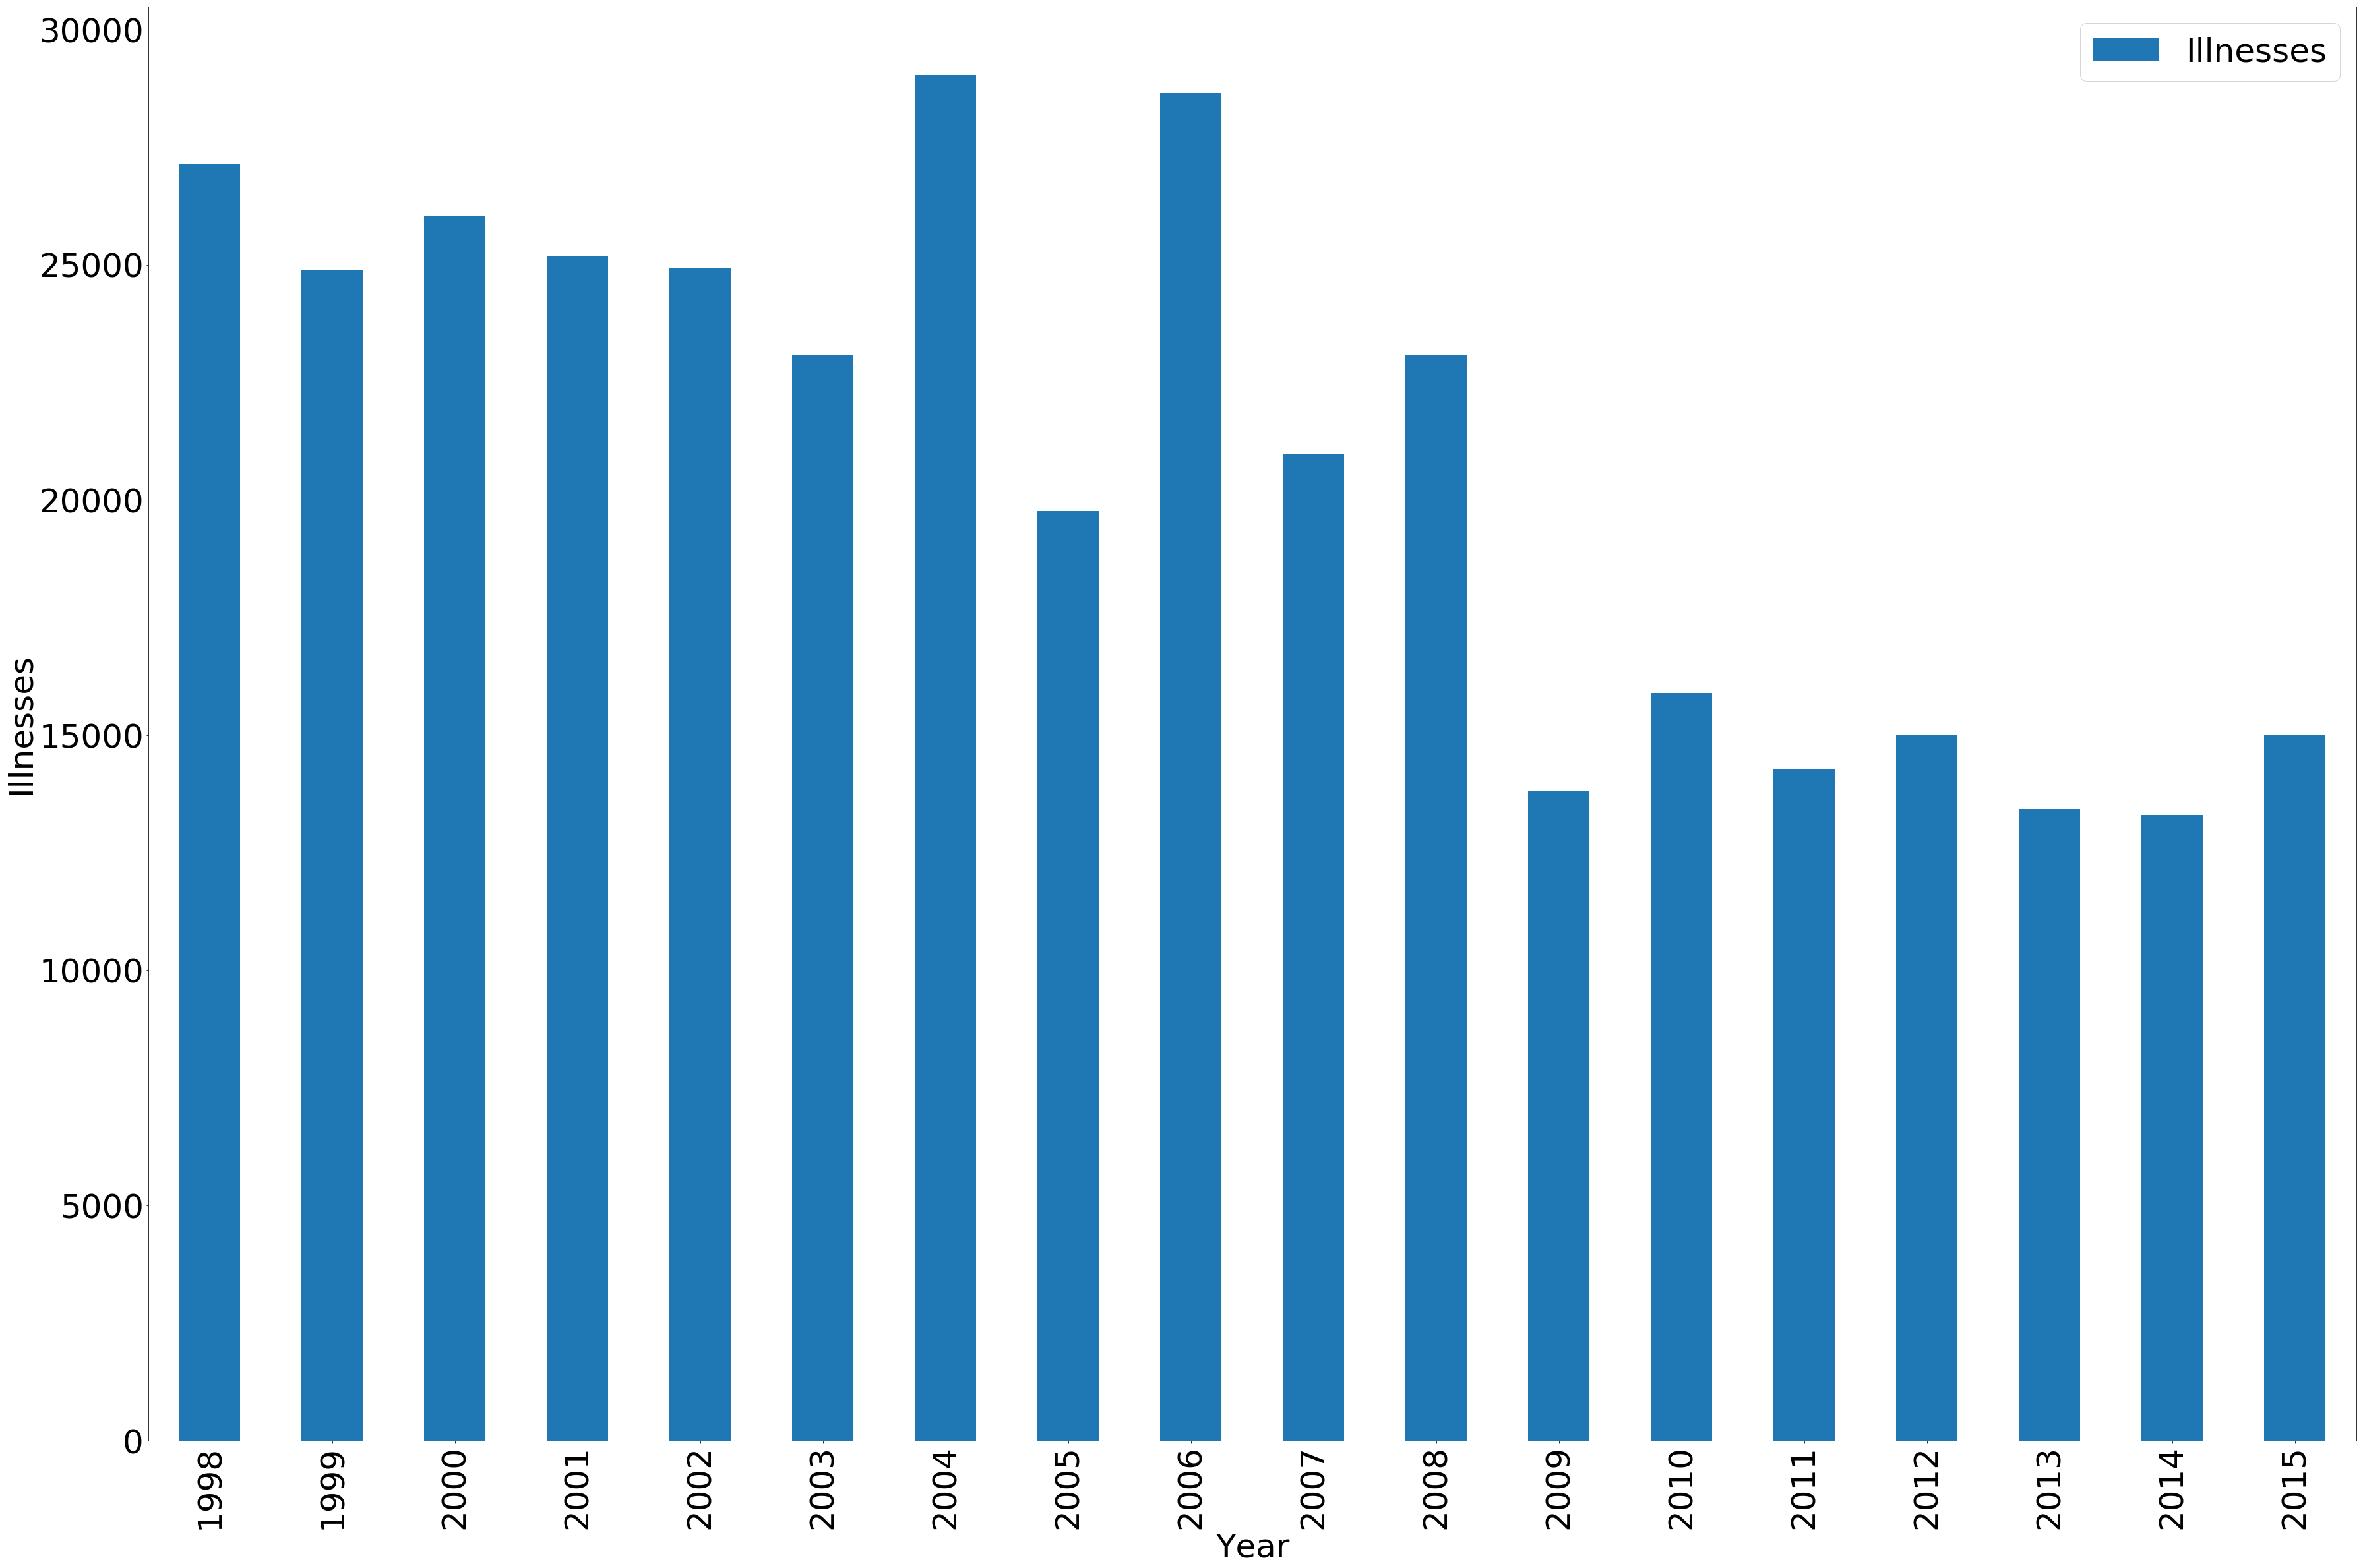

In [ ]:
# Bar graph for year vs illnesses.
year=outbreaks[['Year','Illnesses']]
year_grp=year.groupby('Year')
year_totals=year_grp.sum()
year_fat_plot = year_totals.plot(kind='bar')
year_fat_plot.set_xlabel("Year")
year_fat_plot.set_ylabel("Illnesses")

Text(0, 0.5, 'Fatalities')

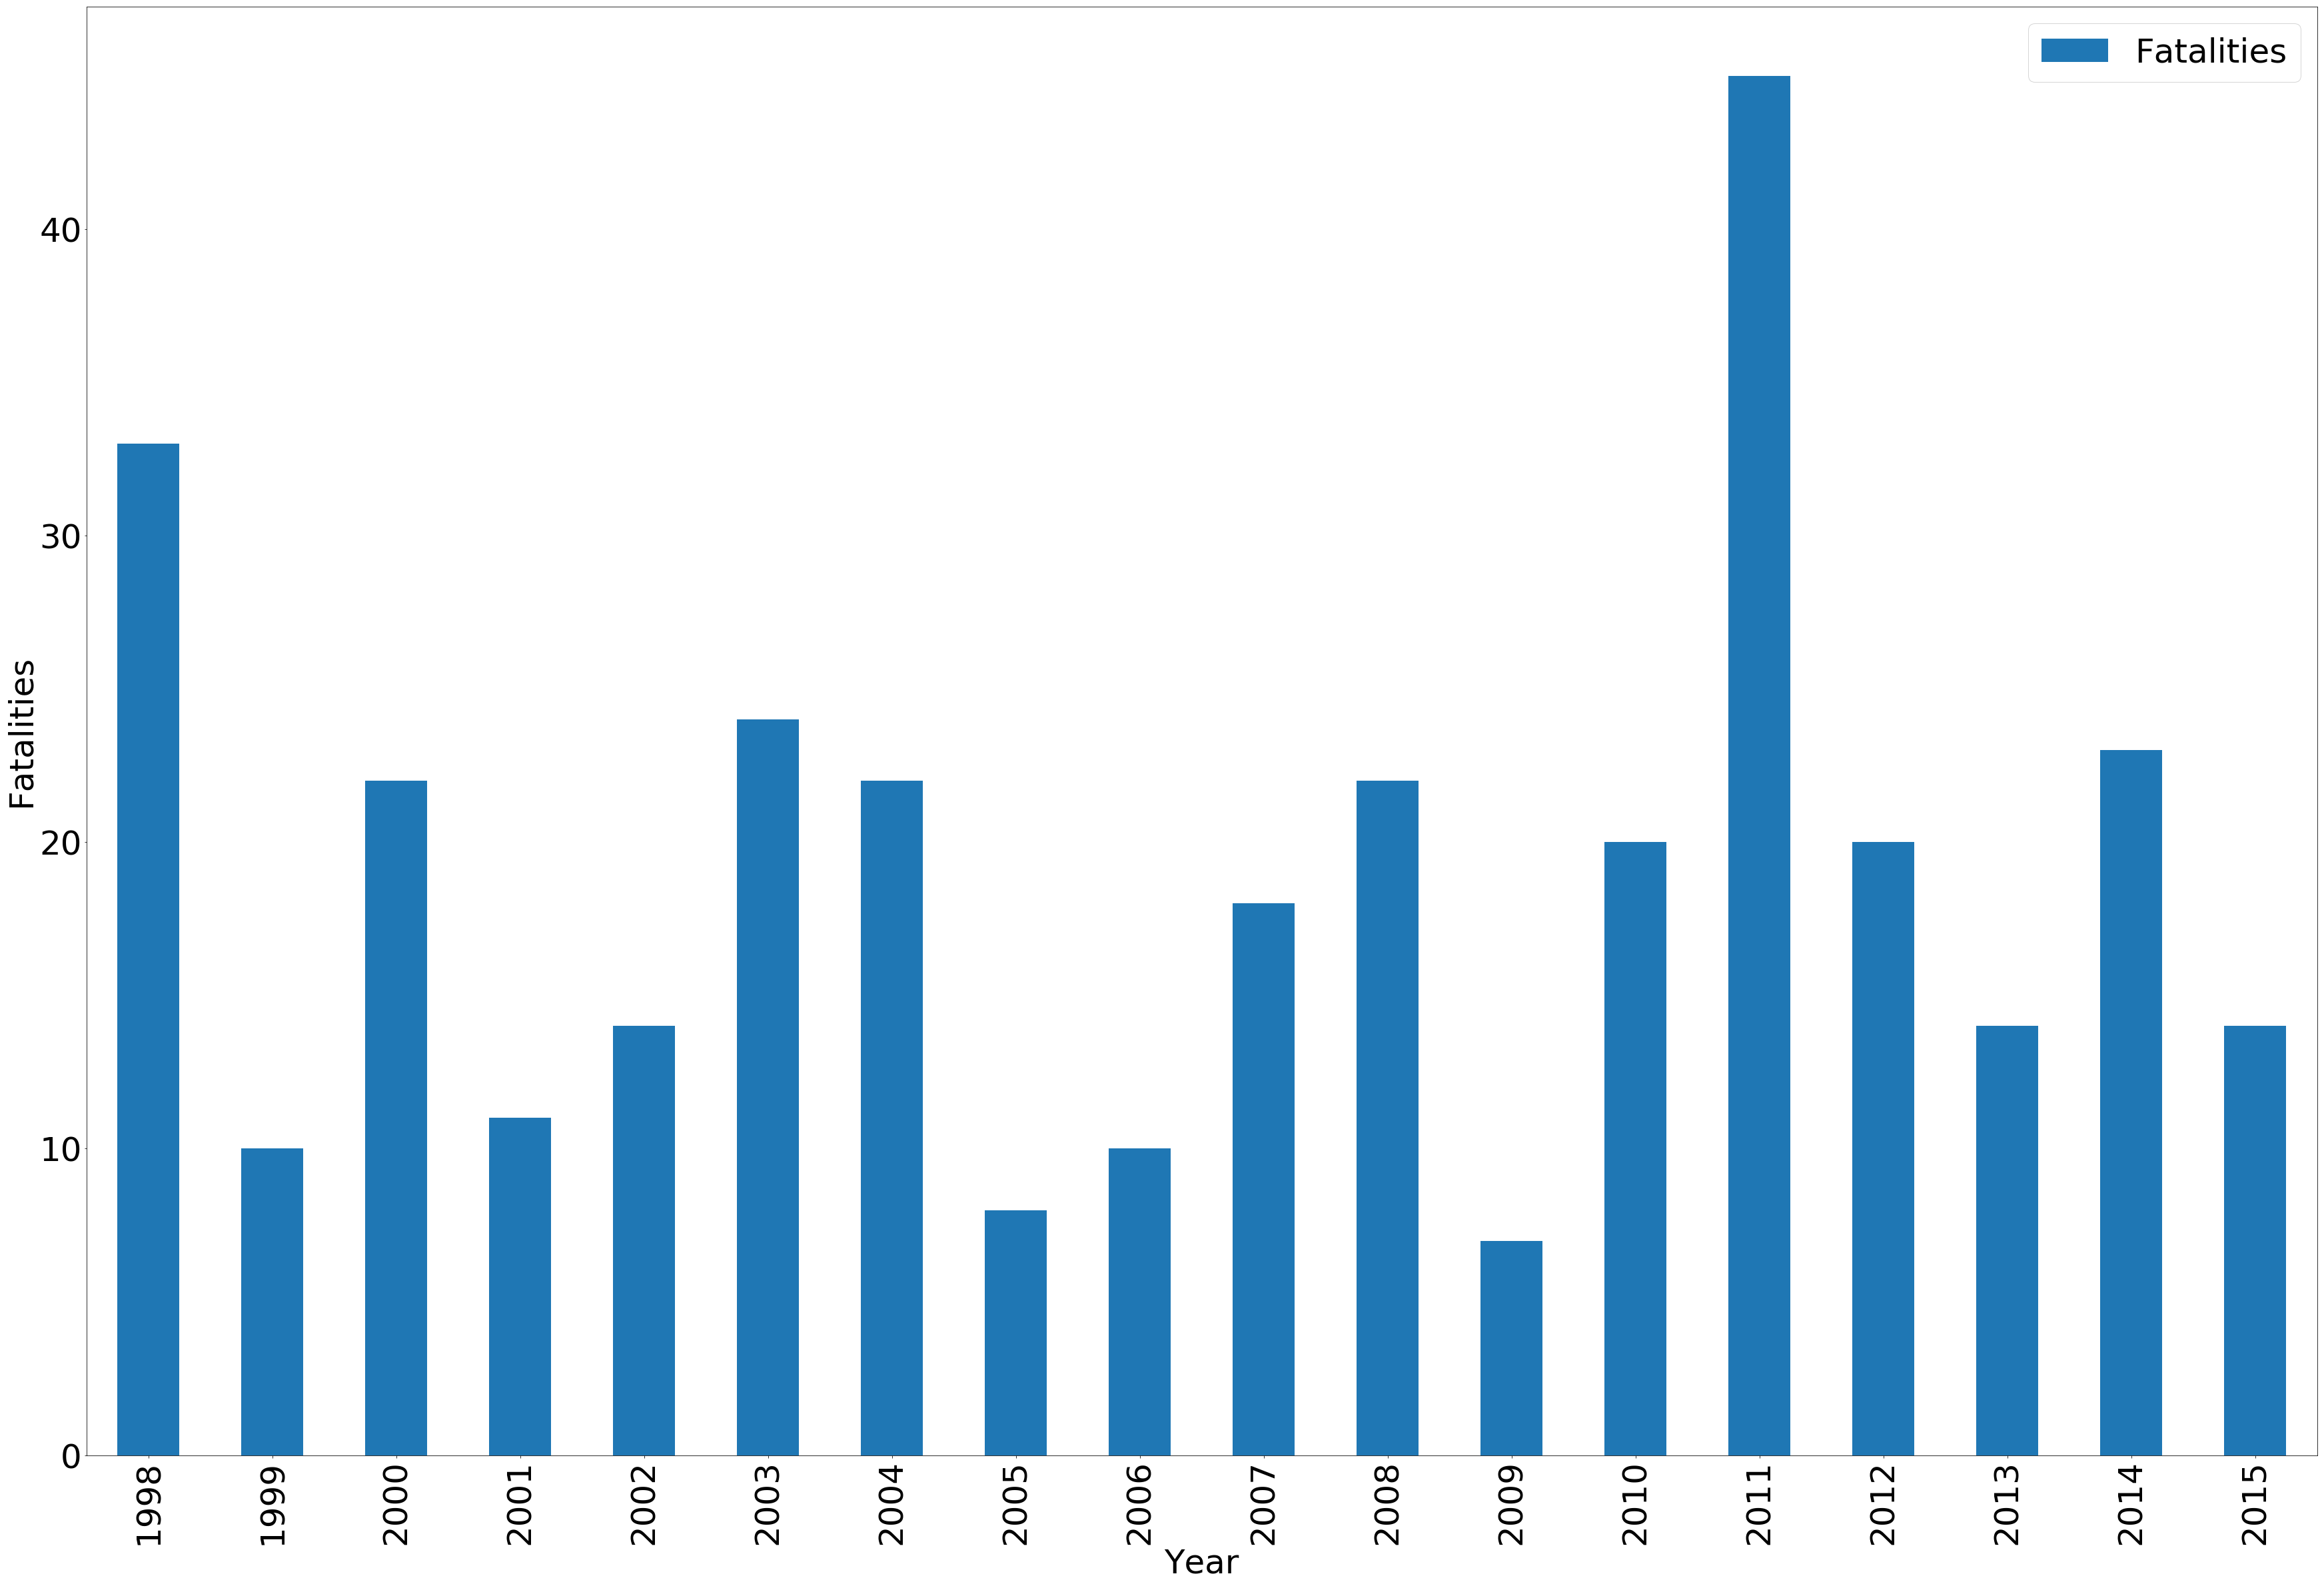

In [ ]:
#Bar graph for year VS fatalities
year=outbreaks[['Year','Fatalities']]
year_grp=year.groupby('Year')
year_totals=year_grp.sum()
year_fat_plot = year_totals.plot(kind='bar')
year_fat_plot.set_xlabel("Year")
year_fat_plot.set_ylabel("Fatalities")

Text(0, 0.5, 'Hospitalizations')

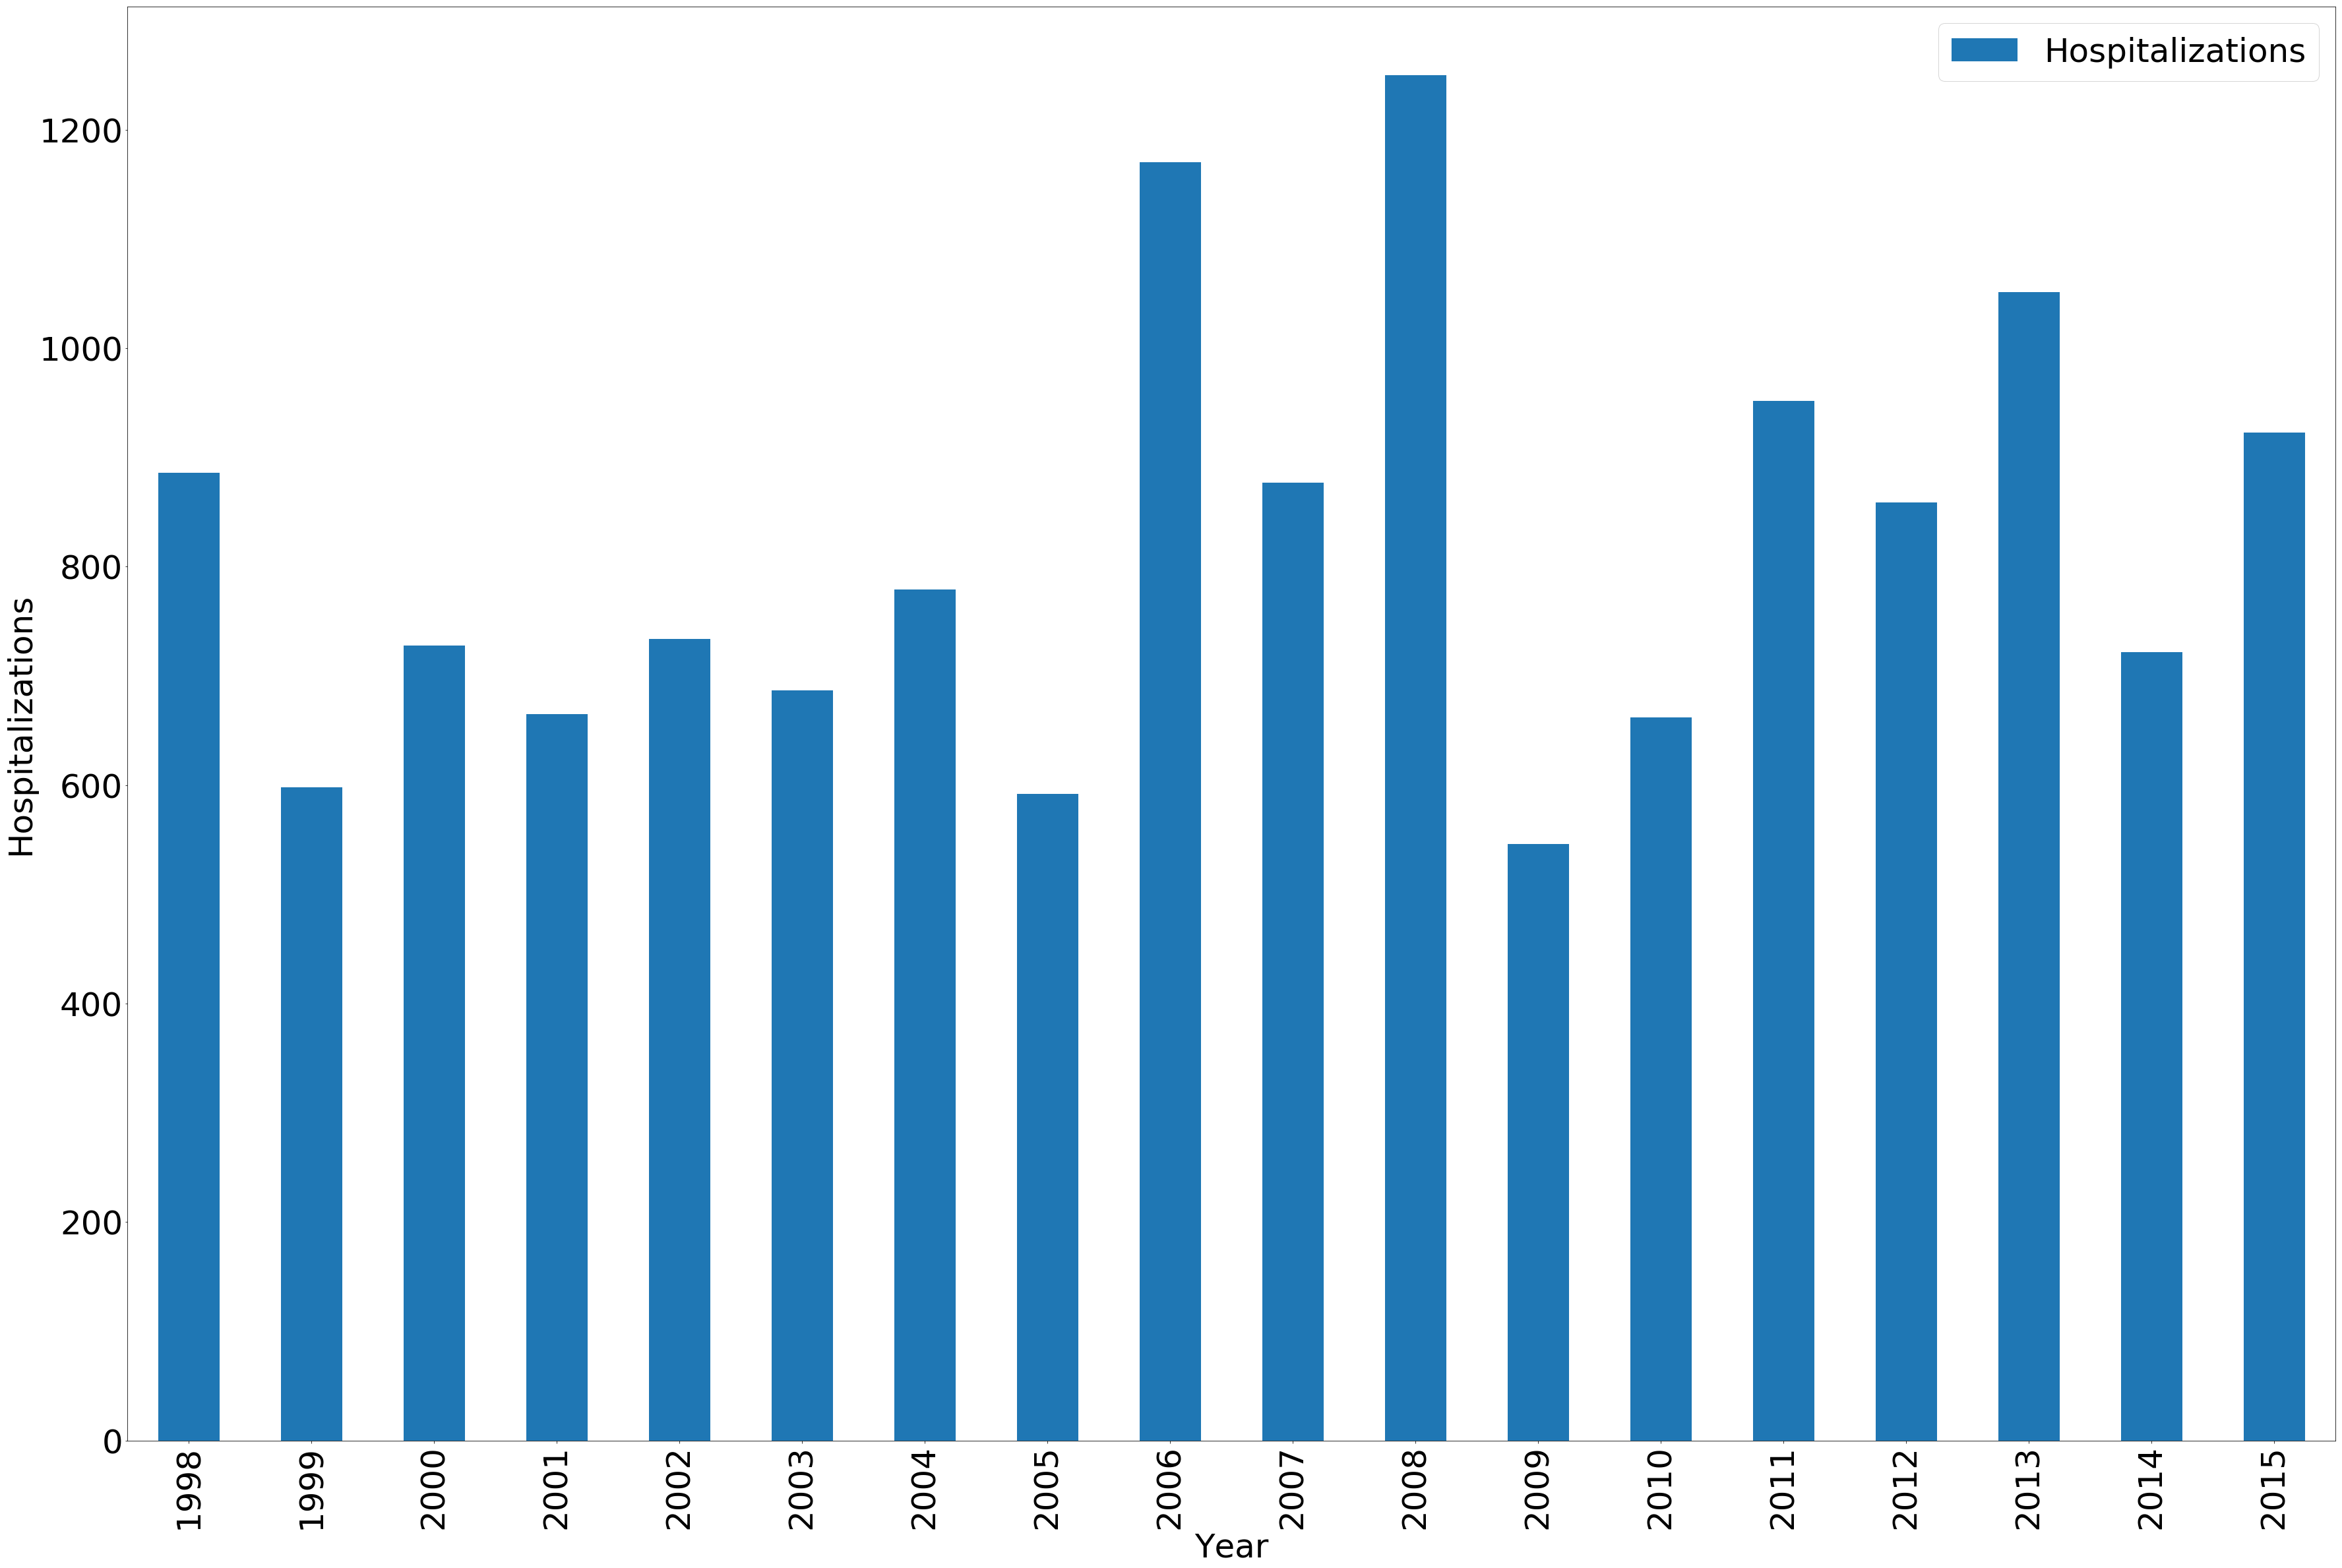

In [ ]:
#Bar graph for year VS hospitalizations
year=outbreaks[['Year','Hospitalizations']]
year_grp=year.groupby('Year')
year_totals=year_grp.sum()
year_fat_plot = year_totals.plot(kind='bar')
year_fat_plot.set_xlabel("Year")
year_fat_plot.set_ylabel("Hospitalizations")

                  Illnesses  Fatalities  Hospitalizations
Illnesses          1.000000    0.099750          0.450739
Fatalities         0.099750    1.000000          0.423716
Hospitalizations   0.450739    0.423716          1.000000


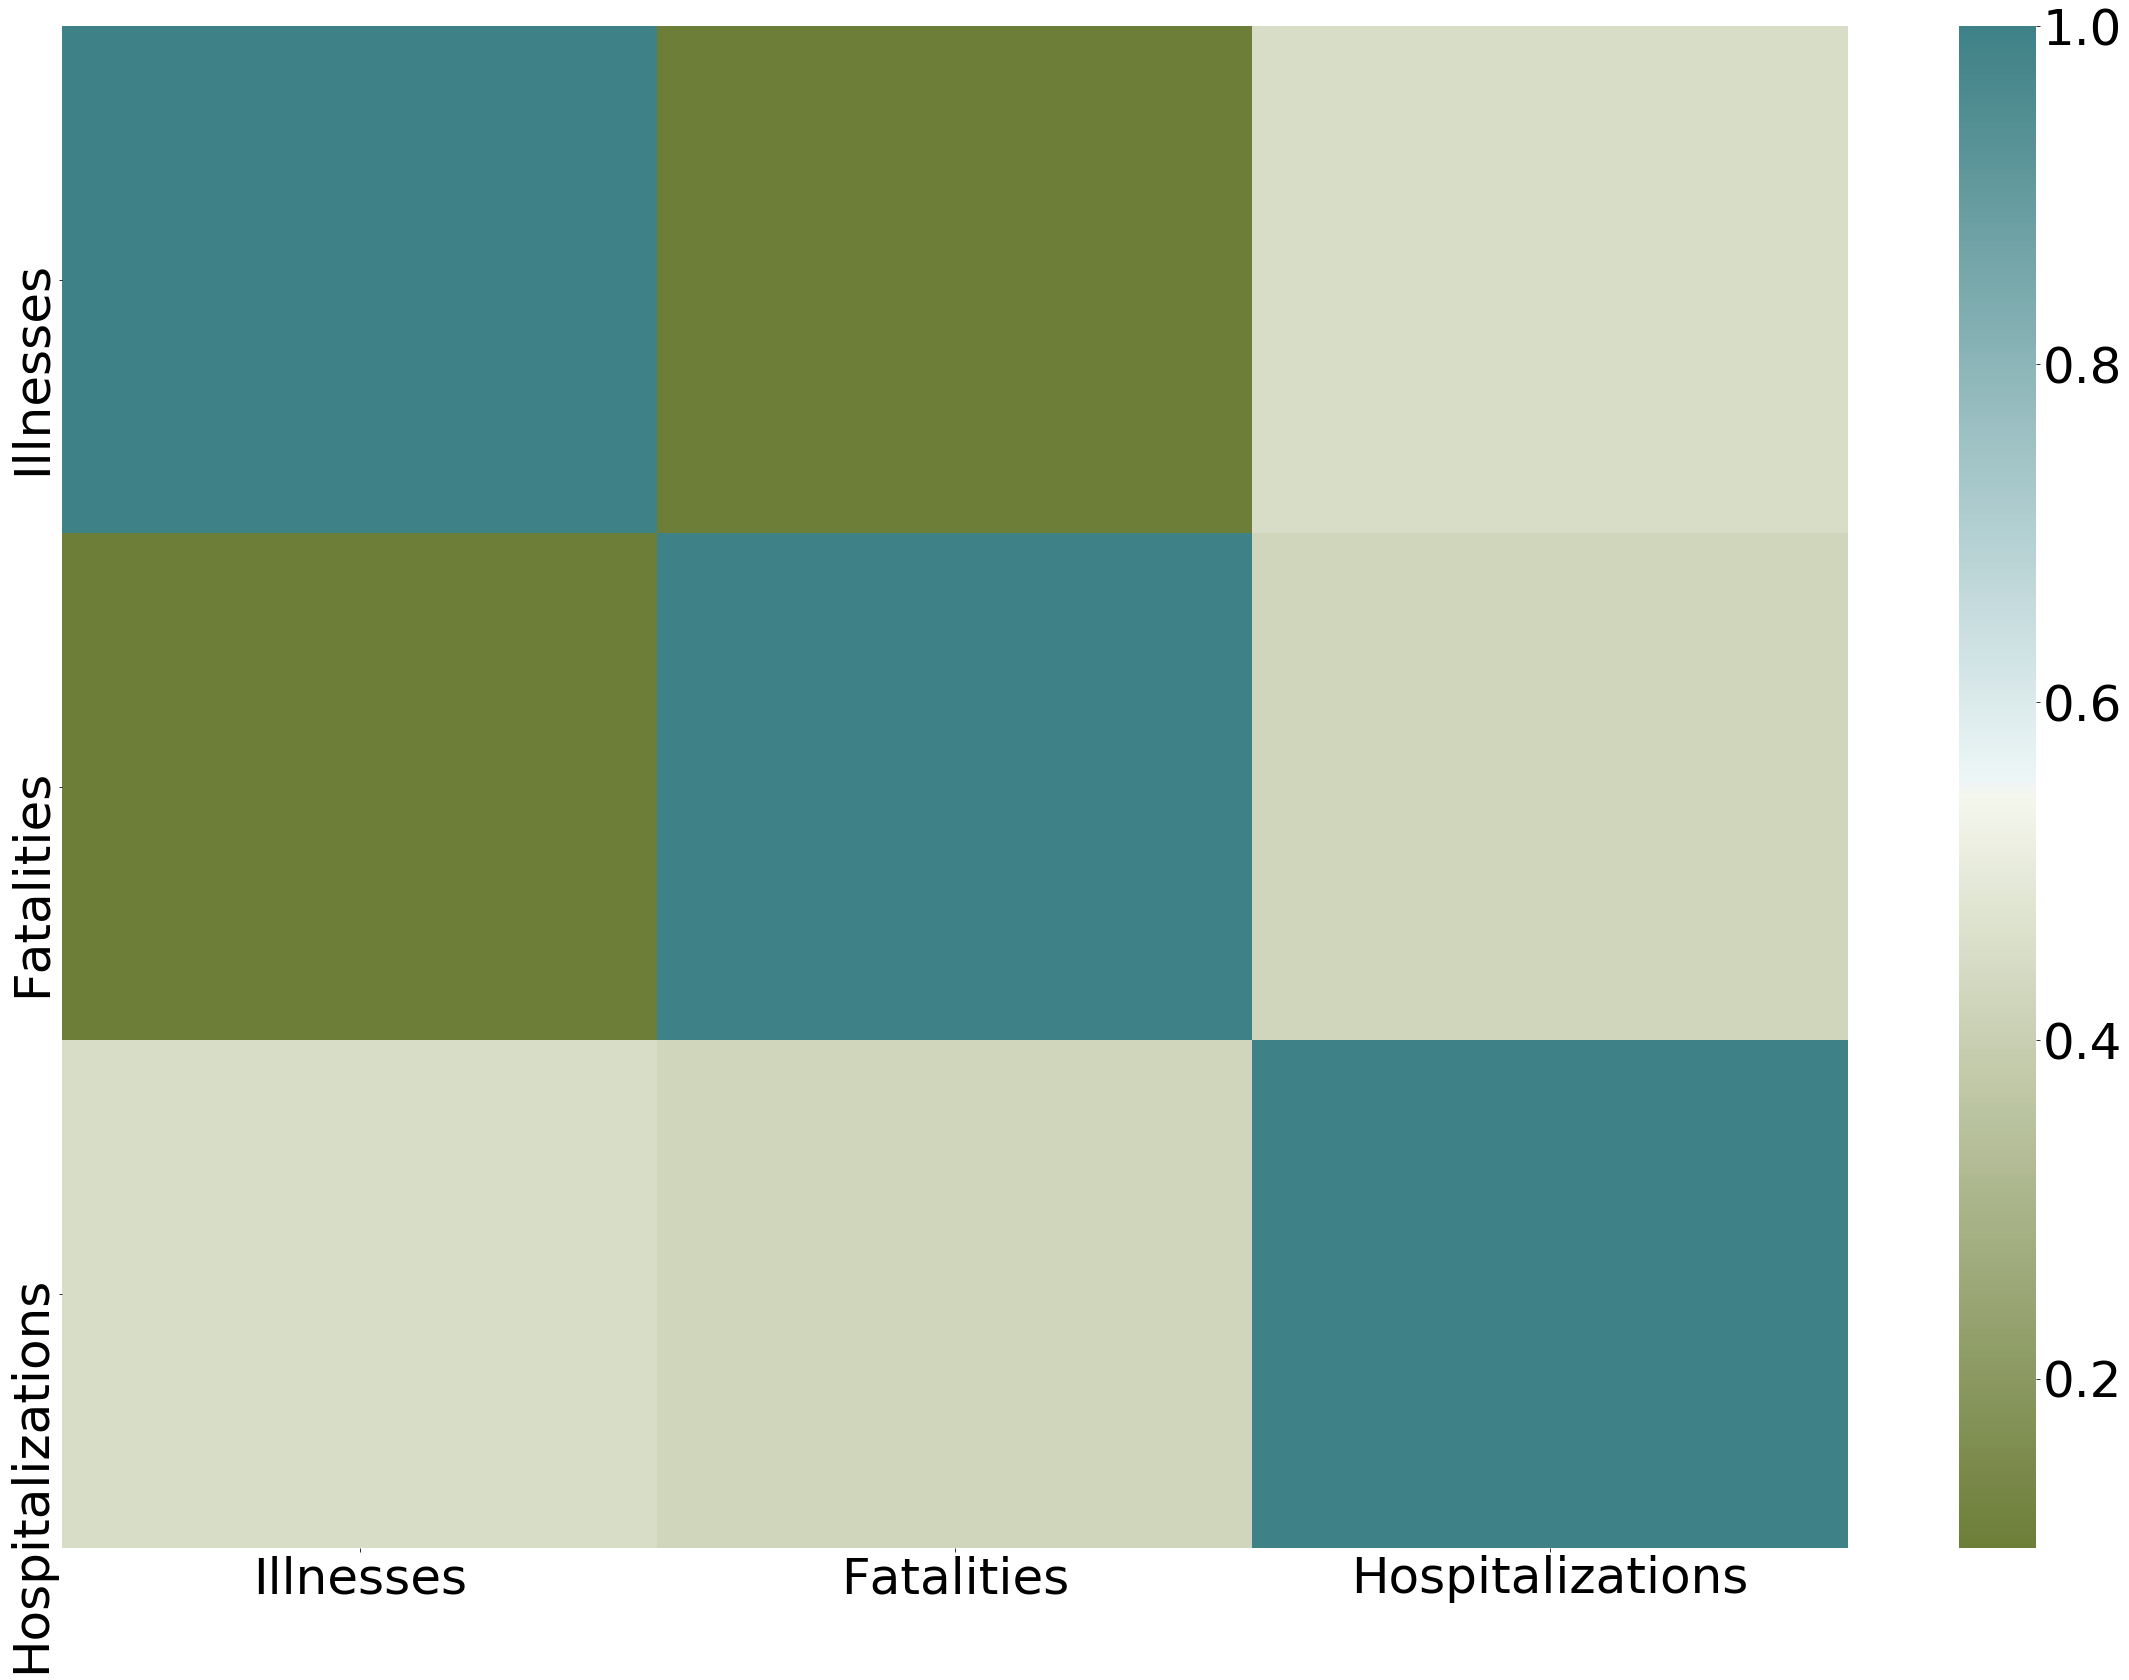

In [ ]:
cmap = sns.diverging_palette(100, 200, sep=1, n=101, as_cmap=True)
correlations = outbreaks[['Illnesses', 'Fatalities', 'Hospitalizations']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
plt.rcParams['figure.figsize'] = (60,40)

Illnesses  [27156, 24899, 26033, 25192, 24939, 23079, 29034, 19761, 28656, 20970, 23089, 13813, 15893, 14278, 14995, 13431, 13295, 15018]
Year  [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


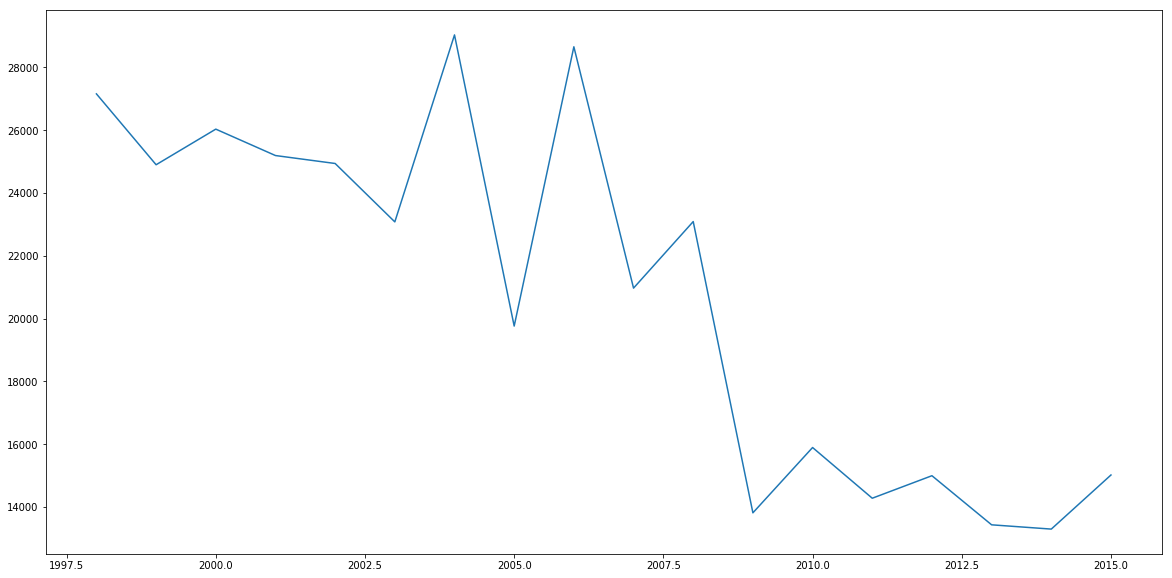

In [ ]:
#To plot a line graph to see if illnesses are decreasing or increasing over the years
illnesses_per_year = []
year=[]
for i in range(1998 , 2016):
    rep = outbreaks[outbreaks['Year']== i]
    year.append(i)
    illnesses_per_year.append(sum(rep['Illnesses']))
print('Illnesses ' , illnesses_per_year)
print('Year ' ,year)
plt.plot(year,illnesses_per_year);
#Line graph concludes that illnesses is infact decreasing over the years. Peaks at 2004 and 2006

In [ ]:
rep_2004 = outbreaks[outbreaks['Year']==2004]
rep_2011 = outbreaks[outbreaks['Year']==2011]
rep_2008 = outbreaks[outbreaks['Year']==2008]


Text(0.5, 1.0, 'Fatalities vs Month for 2004')

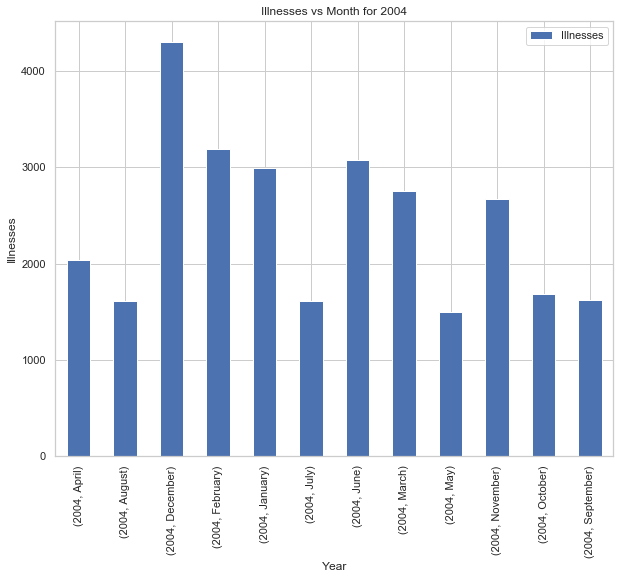

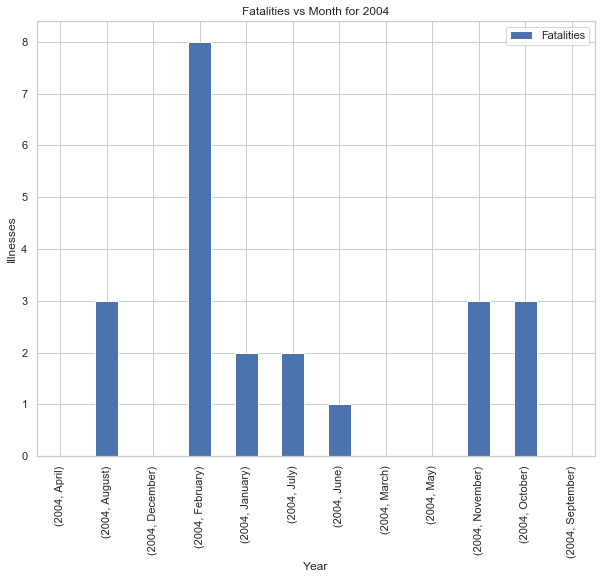

In [ ]:
#For the year 2004 where Illnesses were rated the highest
year_m=rep_2004[['Year', 'Month', 'Illnesses']]
year_mg=year_m.groupby(['Year', 'Month'])
year_mg_total=year_mg.sum()
year_mg_plot = year_mg_total.plot(kind='bar')
year_mg_plot.set_xlabel("Year")
year_mg_plot.set_ylabel("Illnesses")
plt.title('Illnesses vs Month for 2004')


year_m=rep_2004[['Year', 'Month', 'Fatalities']]
year_mg=year_m.groupby(['Year', 'Month'])
year_mg_total=year_mg.sum()
year_mg_plot = year_mg_total.plot(kind='bar')
year_mg_plot.set_xlabel("Year")
year_mg_plot.set_ylabel("Illnesses")
plt.title('Fatalities vs Month for 2004')





Text(0.5, 1.0, 'Fatalities vs Month for 2008')

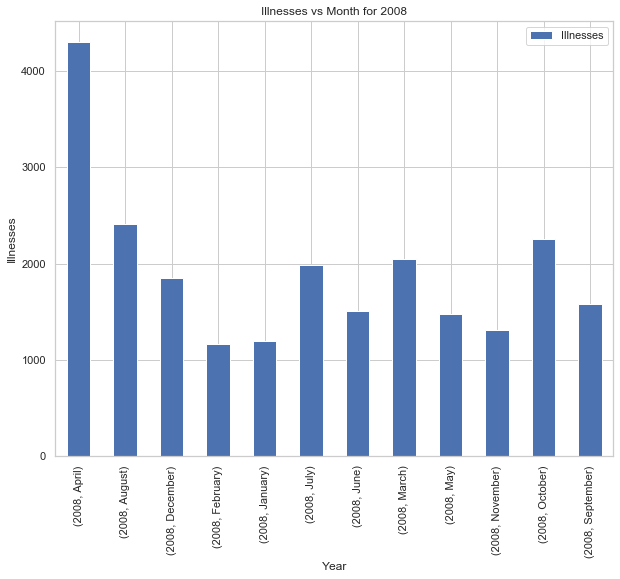

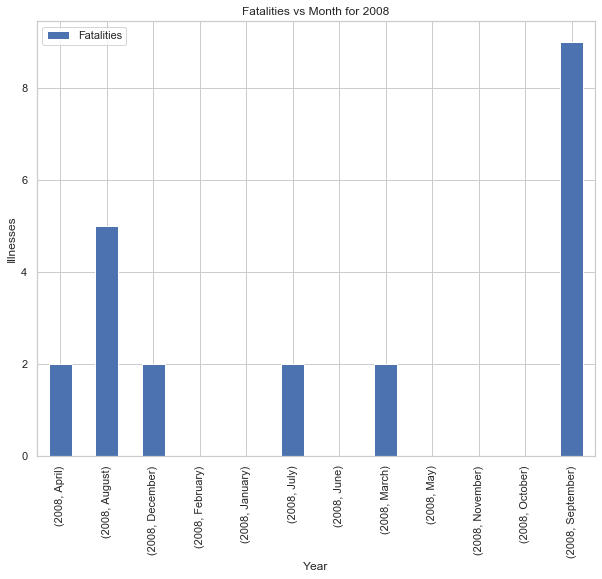

In [ ]:
#For the year 2008 where Illnesses were rated the highest
year_m=rep_2008[['Year', 'Month', 'Illnesses']]
year_mg=year_m.groupby(['Year', 'Month'])
year_mg_total=year_mg.sum()
year_mg_plot = year_mg_total.plot(kind='bar')
year_mg_plot.set_xlabel("Year")
year_mg_plot.set_ylabel("Illnesses")
plt.title('Illnesses vs Month for 2008')


year_m=rep_2008[['Year', 'Month', 'Fatalities']]
year_mg=year_m.groupby(['Year', 'Month'])
year_mg_total=year_mg.sum()
year_mg_plot = year_mg_total.plot(kind='bar')
year_mg_plot.set_xlabel("Year")
year_mg_plot.set_ylabel("Illnesses")
plt.title('Fatalities vs Month for 2008')




Text(0.5, 1.0, 'Fatalities vs Month for 2011')

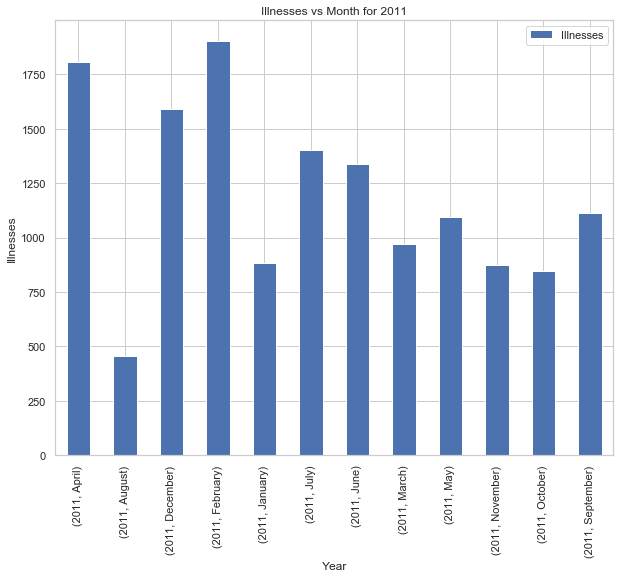

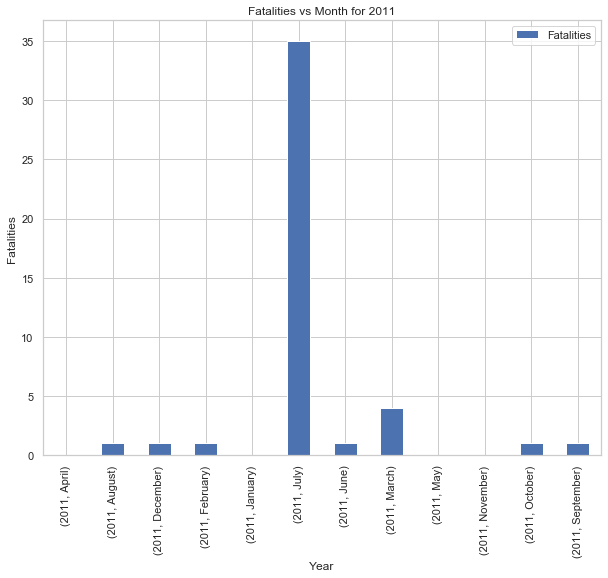

In [ ]:
#For the year 2011 where Illnesses were rated the highest
year_m=rep_2011[['Year', 'Month', 'Illnesses']]
year_mg=year_m.groupby(['Year', 'Month'])
year_mg_total=year_mg.sum()
year_mg_plot = year_mg_total.plot(kind='bar')
year_mg_plot.set_xlabel("Year")
year_mg_plot.set_ylabel("Illnesses")
plt.title('Illnesses vs Month for 2011')


year_m=rep_2011[['Year', 'Month', 'Fatalities']]
year_mg=year_m.groupby(['Year', 'Month'])
year_mg_total=year_mg.sum()
year_mg_plot = year_mg_total.plot(kind='bar')
year_mg_plot.set_xlabel("Year")
year_mg_plot.set_ylabel("Fatalities")
plt.title('Fatalities vs Month for 2011')






In [ ]:
outbreaks['Status'].value_counts(dropna=False)

Confirmed    8107
Unknown      6619
Suspected    4393
Name: Status, dtype: int64

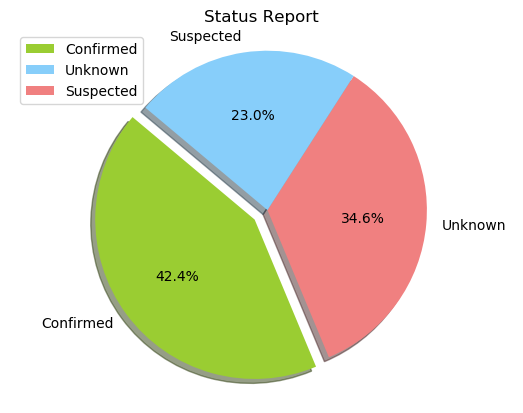

In [ ]:
labels = 'Confirmed' , 'Unknown' , 'Suspected'
sizes = [8107,6619,4393]
colors = [ 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1,0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Status Report')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

In [ ]:
outbreaks = pd.read_csv("final_clean_idsfp.csv")
outbreaks['Location'].value_counts(dropna=False)


Restaurant                               11094
Unknown                                   2522
Private Home/Residence                    1989
Catering Service                          1140
Fast Food Restaurant                       434
Banquet Facility                           392
School/College/University                  358
Grocery Store                              304
Prison/Jail                                193
Nursing Home/Assisted Living Facility      186
Camp                                       120
Religious Facility                         110
Office/Indoor Workplace                    105
Fair/Festival                               83
Hospital                                    42
Child Daycare                               29
Farm/Dairy                                   8
Restaurant Buffet                            8
Ship/Boat                                    1
Hotel/Motel                                  1
Name: Location, dtype: int64

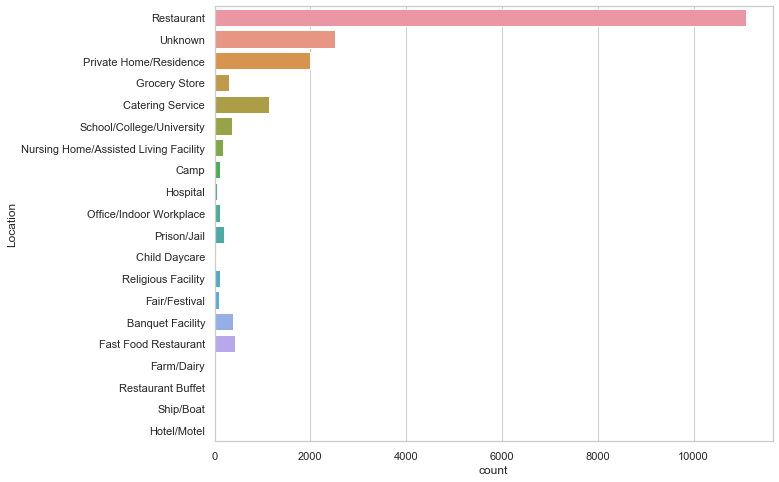

In [ ]:
# To indicate the lifestyle of American citizens.
p = sns.countplot(data=outbreaks, y =outbreaks['Location'])

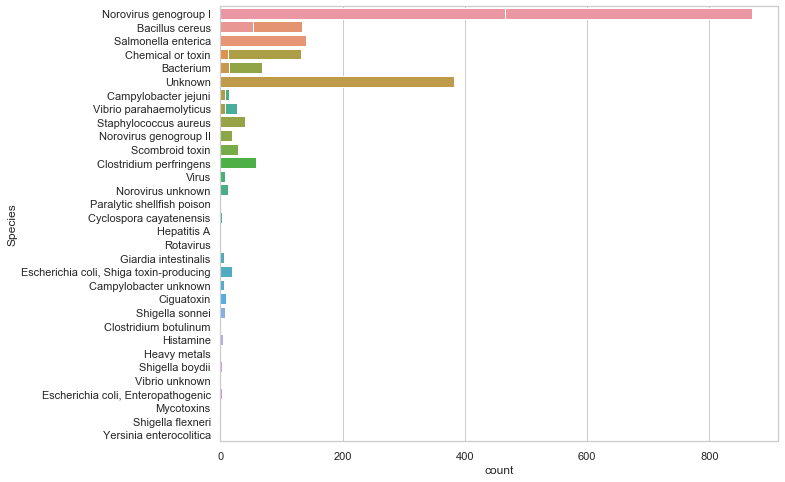

In [ ]:
p = sns.countplot(data=rep_2004, y =rep_2004['Location'])


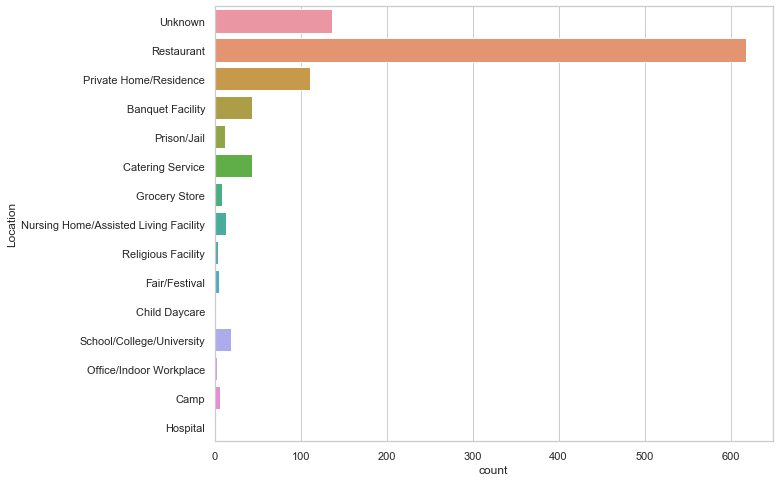

In [ ]:
p = sns.countplot(data=rep_2008, y =rep_2008['Location'])

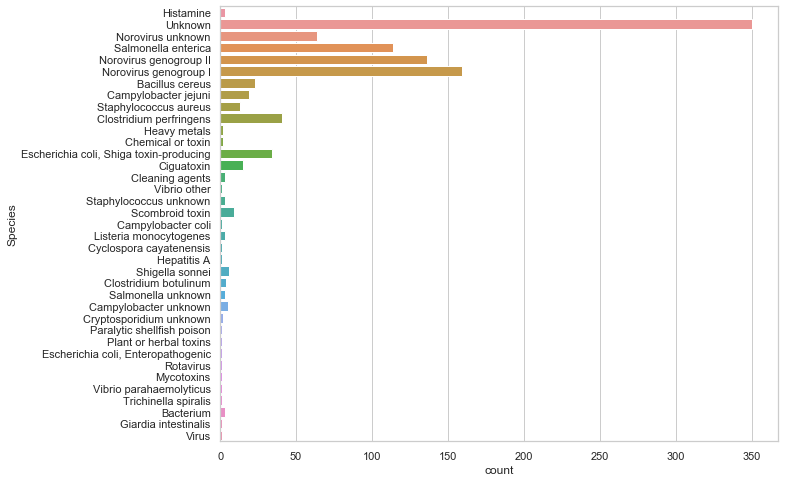

In [ ]:
p = sns.countplot(data=rep_2008, y =rep_2008['Species'])

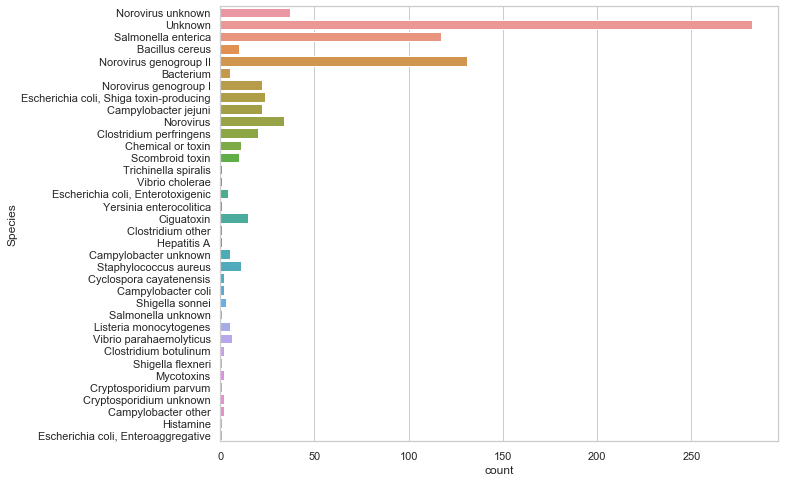

In [ ]:
p = sns.countplot(data=rep_2011, y =rep_2011['Location'])

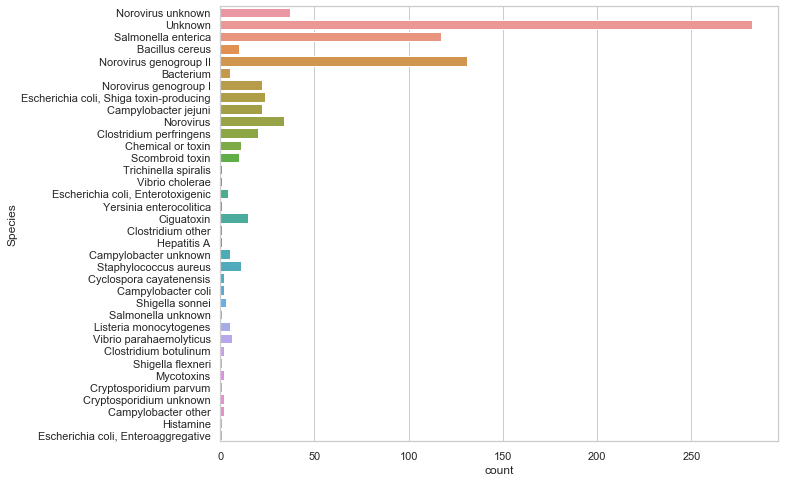

In [ ]:
p = sns.countplot(data=rep_2011, y =rep_2011['Species'])